# Module 1: Elementary Image Operations

In this module, we will learn the basics of manipulating images using Python.

Upon completion of this module, you will be able to:

- Load an image from your local file system and display it in your development environment
- Modify an image by changing its color and geometric properties
- Save an image to your local file system.

## Loading and displaying an image

Let's load an image. We will use the Python OpenCV library `cv2`.

In [26]:
import numpy as np
import cv2 as cv

img = cv.imread('data/red-throated-barbet.jpg')

Let's display the image. We will use the [Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html) library to display images. We should note that OpenCV follows the BGR color convention whereas Matplotlib follows the RGB color convention. Thus, for the image to be rendered correctly, we have to make that conversion first.

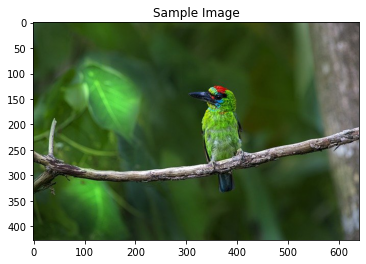

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Convert from BGR to RGB color scheme

plt.imshow(img_rgb)
plt.title('Sample Image')
plt.show()

Matplotlib by default displayes the axes, which in this case correspond to pixel positions. If we don't want to show the axes, we can turn them off by calling the function `axis('off')`.

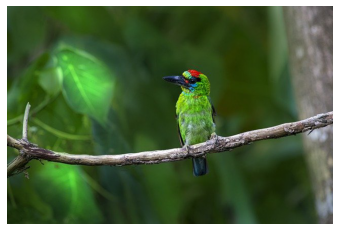

In [28]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## What's in an image?

An image is made of a matrix of pixels. Each pixel has a different color, in a color image, or a different shade of gray, in a grayscale image. 

Let's explore the contents of the bird image above.

In [29]:
print(img.shape)

(427, 640, 3)


We notice that the shape of the matrix `img` in which the image was loaded is (427x640x3). That is because the image has a resolution of 427-by-640 pixels and each pixel is made of three values, its Blue, Green, and Red channels.

We can access the Blue, Green, and Red values of a particular pixel by a simple array operation, e.g.

In [36]:
blue_val = img[10, 20, 0]
green_val = img[10, 20, 1]
red_val = img[10, 20, 2]

print(img[10, 20, :])

[36 74 46]


Each color channel is made of 8 bits, thus it can take 256 possilbe values, from 0 to 255. 0 denoting the complete absense of that color and 255 the maximum value for that color. Every pixel is made of a combination the color values for the B, G, R channels. 

We can split those three channels into its components (B, G, R)

In [31]:
b,g,r = cv.split(img)

In [32]:
print(b.shape)

(427, 640)


We notice that when we print the matrix b of the blue channel, there is no third dimension anymore. We can display each channel separately.

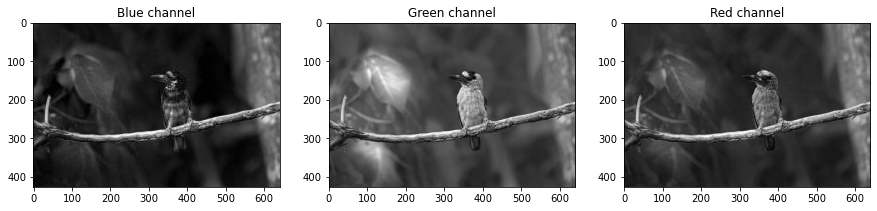

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(231),plt.imshow(b, 'gray'),plt.title('Blue channel')
plt.subplot(232),plt.imshow(g, 'gray'),plt.title('Green channel')
plt.subplot(233),plt.imshow(r, 'gray'),plt.title('Red channel')
plt.show()

In [34]:
patch = g[120:180, 320:380]

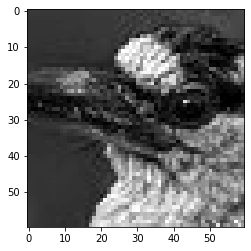

In [58]:
plt.imshow(patch, 'gray')

In [59]:
print(patch)

[[ 57  57  57 ...  70  73  75]
 [ 56  56  56 ...  70  72  74]
 [ 54  54  54 ...  71  72  73]
 ...
 [ 60  58  54 ... 151 151 183]
 [ 60  57  54 ... 253 172 135]
 [ 59  56  53 ... 143 224 154]]


We can also save an image to our file system. For example if we wanted to save the cropped patch:

In [35]:
cv.imwrite('data/patch.png', patch)

True